# Transformations for image compression - 10 points

- Implement DCT and inverse DCT(invDCT) transformations. (6 pts)
- Prepare rounding of DCT coefficients and also a methodology that tries to assign zero to the last DCT coefficient, to the last two DCT coefficients and so on. (2 pts)
- Measure mean squared error (MSE) between original values and different rounding and zero assignments in reconstructed image = invDCT(DCT(original image)). (2 pts)
- You can use 1D or 2D DCT.

- Dochází k extrakci nejdůlěžitějších signálů skrz magickou matematickou rovnici. Ave kosinus!
- V podstatě vychází z myšlenky, kdy obrázek je reprezentovány pixely, kde každý pixel má někdy silnou korelaci s ostatními z jeho okolí.

Assignment:

- https://homel.vsb.cz/~vas218/acs.html

Reference:

- https://towardsdatascience.com/image-compression-dct-method-f2bb79419587
- https://www.youtube.com/watch?v=h3u-lVDyHD4&ab_channel=TheVertex
- https://github.com/RiccardoBonesi/dct/blob/master/my_dct.py
- https://users.cs.cf.ac.uk/Dave.Marshall/Multimedia/node231.html
- https://cs.marlboro.college/cours/spring2019/algorithms/code/discrete_cosine_transform/dct.html
- https://inst.eecs.berkeley.edu/~ee123/sp16/Sections/JPEG_DCT_Demo.html
- https://cs.stanford.edu/people/eroberts/courses/soco/projects/data-compression/lossy/jpeg/dct.htm

### Implement DCT and inverse DCT(invDCT) transformations. (6 pts)

In [73]:
import numpy as np
import math
import pandas as pd

In [74]:
path = 'lena.png'

In [75]:
def load_image(path):
    return cv2.imread(path, 0)

In [76]:
def show_image(img):
    plt.axis('off')
    plt.imshow(img, cmap='gray')

In [77]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [78]:
IMG = load_image(path)

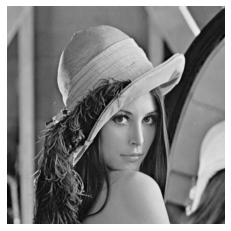

In [79]:
show_image(IMG)

In [125]:
test = np.array([
    [52, 55, 61, 66, 70, 61, 64, 73],
    [63, 59, 55, 90, 109, 85, 69, 72],
    [62, 59, 68, 113, 144, 104, 66, 73],
    [63, 58, 71, 122, 154, 106, 70, 69],
    [67, 61, 68, 104, 126, 88, 68, 70],
    [79, 65, 60, 70, 77, 68, 58, 75],
    [85, 71, 64, 59, 55, 61, 65, 83],
    [87, 79, 69, 68, 65, 76, 78, 94],
])

In [126]:
def to_shifted_image(img):
    shifted = img - 128
    return shifted

In [127]:
shifted_img = to_shifted_image(test)

In [128]:
def from_shifted_image(img):
    original = img + 128
    return original

In [129]:
original = from_shifted_image(shifted_img)

In [130]:
def calc_dct_pos(u, v, m, n, img):

    suma = 0
    for x in range(m):
        for y in range(n):
            first = ((2 * x + 1) * u * math.pi) / (2 * m)
            second = ((2 * y + 1) * v * math.pi) / (2 * n)
            suma += img[x, y] * math.cos(first) * math.cos(second)

    a_u = 1/math.sqrt(2) if u == 0 else 1
    a_v = 1/math.sqrt(2) if v == 0 else 1 
    
    res = (1 / math.sqrt(2*n)) * a_u * a_v * suma

    return res

In [131]:
def calc_inv_dct_pos(x, y, m, n, current_dct):
    suma = 0

    for u in range(n):
        for v in range(m):
            a_u = 1/math.sqrt(2) if u == 0 else 1
            a_v = 1/math.sqrt(2) if v == 0 else 1 
            first = ((2 * x + 1) * u * math.pi) / (2 * m)
            second = ((2 * y + 1) * v * math.pi) / (2 * n)
            suma += a_u * a_v * current_dct[u, v] * math.cos(first) * math.cos(second)

    res = (1 / math.sqrt(2*n)) * suma
    return res

In [132]:
def inv_dct(dct):
    m = dct.shape[0] #columns 
    n = dct.shape[1] #rows

    original_matrix = np.zeros(shape=(n, m))

    for x in range(m): #vertical    
        for y in range(n): #horizontal
            original_matrix[y, x] = calc_inv_dct_pos(x, y, m, n, dct)
    
    return original_matrix


In [133]:
def dct(shifted_img):
    m = shifted_img.shape[0] #columns 
    n = shifted_img.shape[1] #rows

    dct_matrix = np.zeros(shape=(n, m))

    for v in range(m): #vertical    
        for u in range(n): #horizontal
            dct_matrix[v, u] = calc_dct_pos(u ,v, m, n, shifted_img)
    
    return dct_matrix

In [134]:
dct_matrix = dct(shifted_img)

In [135]:
pd.DataFrame(dct_matrix)

,0,1,2,3,4,5,6,7
0,-415.375000,4.465524,-46.834485,-48.534967,12.125000,-7.734744,-1.030674,-0.165376
1,-30.185717,-21.857439,7.370597,12.068361,-6.553450,2.905461,0.183067,0.141607
2,-61.197062,-60.758038,77.129388,34.099767,-13.196121,2.379796,0.416815,-1.071536
3,27.239322,10.253637,-24.561982,-14.759411,-3.951428,-5.939314,-2.415561,-4.192912
4,56.125000,13.145110,-28.911688,-10.240607,-1.875000,-2.377797,-0.877794,-1.170314
5,-20.095174,-7.087418,9.933521,6.295967,1.745284,0.941392,-3.019307,-0.097761
6,-2.387647,-8.535437,5.416815,1.831165,-2.787228,4.303713,4.120612,0.501269
7,0.461815,4.876888,-5.648951,1.945937,3.135282,1.848691,-0.661948,1.675459


In [136]:
original_matrix = from_shifted_image(inv_dct(dct_matrix))
pd.DataFrame(original_matrix)

,0,1,2,3,4,5,6,7
0,52.0,55.0,61.0,66.0,70.0,61.0,64.0,73.0
1,63.0,59.0,55.0,90.0,109.0,85.0,69.0,72.0
2,62.0,59.0,68.0,113.0,144.0,104.0,66.0,73.0
3,63.0,58.0,71.0,122.0,154.0,106.0,70.0,69.0
4,67.0,61.0,68.0,104.0,126.0,88.0,68.0,70.0
5,79.0,65.0,60.0,70.0,77.0,68.0,58.0,75.0
6,85.0,71.0,64.0,59.0,55.0,61.0,65.0,83.0
7,87.0,79.0,69.0,68.0,65.0,76.0,78.0,94.0


In [109]:
quant_matrix = [
    [
        [16, 11, 10, 16, 24, 40, 51, 61],
        [12, 12, 14, 19, 26, 58, 60, 55],
        [14, 13, 16, 24, 40, 57, 69, 56],
        [14, 17, 22, 29, 51, 87, 80, 62],
        [18, 22, 37, 56, 68, 109, 103, 77],
        [24, 35, 55, 64, 81, 104, 113, 92],
        [49, 64, 78, 87, 103, 121, 120, 101],
        [72, 92, 95, 98, 112, 100, 103, 99]
    ]
]

In [110]:
def to_quantize(dct_matrix, quant_matrix):
    return np.round(dct_matrix / quant_matrix)

In [111]:
def from_quantize(b, quant_matrix):
    return b * quant_matrix

In [112]:
quant = to_quantize(dct_matrix, quant_matrix[0])
pd.DataFrame(quant)

,0,1,2,3,4,5,6,7
0,-26.0,0.0,-5.0,-3.0,1.0,-0.0,-0.0,-0.0
1,-3.0,-2.0,1.0,1.0,-0.0,0.0,0.0,0.0
2,-4.0,-5.0,5.0,1.0,-0.0,0.0,0.0,-0.0
3,2.0,1.0,-1.0,-1.0,-0.0,-0.0,-0.0,-0.0
4,3.0,1.0,-1.0,-0.0,-0.0,-0.0,-0.0,-0.0
5,-1.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0
6,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0
7,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0


In [96]:
original = from_quantize(quant, quant_matrix[0])
pd.DataFrame(original)

,0,1,2,3,4,5,6,7
0,-416.0,0.0,-50.0,-48.0,24.0,-0.0,-0.0,-0.0
1,-36.0,-24.0,14.0,19.0,-0.0,0.0,0.0,0.0
2,-56.0,-65.0,80.0,24.0,-0.0,0.0,0.0,-0.0
3,28.0,17.0,-22.0,-29.0,-0.0,-0.0,-0.0,-0.0
4,54.0,22.0,-37.0,-0.0,-0.0,-0.0,-0.0,-0.0
5,-24.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0
6,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0
7,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0


In [140]:
from sklearn.metrics import mean_squared_error

In [143]:
quants = {
    "tmp": quant_matrix[0]
}

In [141]:
def mse(original, reconstructed):
    return mean_squared_error(original, reconstructed)

In [149]:
def run(original, quants):
    res = {}
    
    shifted_img = to_shifted_image(original)
    dct_matrix = dct(shifted_img)
    
    for k, v in quants.items():
        current_quant = to_quantize(dct_matrix, v)

        from_quant = from_quantize(current_quant, v)

        from_dct = inv_dct(from_quant)

        reconstructed_img = from_shifted_image(from_dct)

        res[k] = mse(original, reconstructed_img)

    return res

In [150]:
res = run(test, quants)

In [152]:
pd.DataFrame.from_dict(res, orient="index")

,0
tmp,28.013561


### Prepare rounding of DCT coefficients and also a methodology that tries to assign zero to the last DCT coefficient, to the last two DCT coefficients and so on. (2 pts) 

### Measure mean squared error (MSE) between original values and different rounding and zero assignments in reconstructed image = invDCT(DCT(original image)). (2 pts)